In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### We will pull three years (2017,2018,2019) of NFL fantasy stats from the open API at https://www.fantasyfootballdatapros.com. The format for each draft year's URL is https://www.fantasyfootballdatapros.com/api/players/{year}/all, where {year} is substituted for the desired year of the fantasy stats. We create a list of the draft years and run a for loop to generate a URL for each year. For each year, we call the API using a get request and create a response object. We then extract the JSON data using.json() on the response object. We then use the pd.json_normalize() method on the data to create a data frame from the nested JSON data. We append the data frames to a list of three data frames.


In [2]:
list_of_df = []
for year in [2017,2018,2019]:
    url = "https://www.fantasyfootballdatapros.com/api/players/{year}/all".format(year=year)
    response = requests.get(url)
    data = response.json()
    df = pd.json_normalize(data)
    
    # Data cleansing step 1 - There is no column to track the year of the stats, so we will add a blank column first.
    # We insert the column as the first column in the dataframe.    
    df.insert(0,'stats_year','')
    
    # Next we will assign the column to be equal to the year of the season in which the stats were accrued.
    df['stats_year'] = year
    
    list_of_df.append(df)

In [3]:
# We concatenate the three dataframes together
fantasy_df = pd.concat(list_of_df, sort=False)

In [4]:
fantasy_df.head()

,stats_year,fumbles_lost,games_played,player_name,position,team,stats.passing.int,stats.passing.passing_att,stats.passing.passing_cmp,stats.passing.passing_td,stats.passing.passing_yds,stats.receiving.receiving_td,stats.receiving.receiving_yds,stats.receiving.receptions,stats.receiving.targets,stats.rushing.rushing_att,stats.rushing.rushing_td,stats.rushing.rushing_yds
0,2017,2.0,15.0,Todd Gurley,RB,LAR,0.0,0.0,0.0,0.0,0.0,6.0,788.0,64.0,87.0,279.0,13.0,1305.0
1,2017,2.0,15.0,Le'Veon Bell,RB,PIT,0.0,0.0,0.0,0.0,0.0,2.0,655.0,85.0,106.0,321.0,9.0,1291.0
2,2017,1.0,16.0,Kareem Hunt,RB,KAN,0.0,0.0,0.0,0.0,0.0,3.0,455.0,53.0,63.0,272.0,8.0,1327.0
3,2017,1.0,16.0,Alvin Kamara,RB,NOR,0.0,0.0,0.0,0.0,0.0,5.0,826.0,81.0,100.0,120.0,8.0,728.0
4,2017,0.0,16.0,Melvin Gordon,RB,LAC,0.0,0.0,0.0,0.0,0.0,4.0,476.0,58.0,83.0,284.0,8.0,1105.0


### Due to the way that .json_normalize() unpacks the nested JSON, the column names are messy and ambiguous. We will rename them for more clarity.

In [5]:
# Data Cleaning step 2 - Rename column names
fantasy_df.columns = fantasy_df.columns.str.replace(r"stats.passing.", "")
fantasy_df.columns = fantasy_df.columns.str.replace(r"stats.receiving.", "")
fantasy_df.columns = fantasy_df.columns.str.replace(r"stats.rushing.", "")

In [6]:
fantasy_df.head()

,stats_year,fumbles_lost,games_played,player_name,position,team,int,passing_att,passing_cmp,passing_td,passing_yds,receiving_td,receiving_yds,receptions,targets,rushing_att,rushing_td,rushing_yds
0,2017,2.0,15.0,Todd Gurley,RB,LAR,0.0,0.0,0.0,0.0,0.0,6.0,788.0,64.0,87.0,279.0,13.0,1305.0
1,2017,2.0,15.0,Le'Veon Bell,RB,PIT,0.0,0.0,0.0,0.0,0.0,2.0,655.0,85.0,106.0,321.0,9.0,1291.0
2,2017,1.0,16.0,Kareem Hunt,RB,KAN,0.0,0.0,0.0,0.0,0.0,3.0,455.0,53.0,63.0,272.0,8.0,1327.0
3,2017,1.0,16.0,Alvin Kamara,RB,NOR,0.0,0.0,0.0,0.0,0.0,5.0,826.0,81.0,100.0,120.0,8.0,728.0
4,2017,0.0,16.0,Melvin Gordon,RB,LAC,0.0,0.0,0.0,0.0,0.0,4.0,476.0,58.0,83.0,284.0,8.0,1105.0


### Now we will check the value_counts of the games_played column to look for outliers.

In [7]:
fantasy_df.games_played.value_counts()

16.0    512
15.0    172
14.0    141
13.0    102
1.0     101
11.0     85
3.0      85
8.0      82
2.0      80
12.0     76
5.0      69
10.0     67
4.0      67
7.0      61
6.0      58
9.0      52
0.0       2
17.0      1
Name: games_played, dtype: int64

### The NFL season is only 16 games, but there is one player in our data that played 17 games and two that played zero. We filter the data to inspect further.

In [8]:
# Data cleaning step 3 - identifying outliers.
fantasy_df[(fantasy_df['games_played']==17)|(fantasy_df['games_played']==0)]

,stats_year,fumbles_lost,games_played,player_name,position,team,int,passing_att,passing_cmp,passing_td,passing_yds,receiving_td,receiving_yds,receptions,targets,rushing_att,rushing_td,rushing_yds
563,2018,0.0,0.0,Garrett Griffin,0,NOR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,2018,0.0,0.0,Hunter Henry,0,LAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,2019,0.0,17.0,Emmanuel Sanders,WR,2TM,0.0,1.0,1.0,1.0,35.0,5.0,869.0,66.0,97.0,0.0,0.0,0.0


### Emmanuel Sanders was traded mid-season from the Denver Broncos to the San Francisco 49ers. The trade occurred before the Bronco's bye-week, but after the 49ers had taken their bye-week.  As a result, Sanders ended up playing an extra week during the 2019 season. Hunter Henry and Garrett Griffin were unable to play during the 2018 regular season due to injury. Next, we will look at the position column.

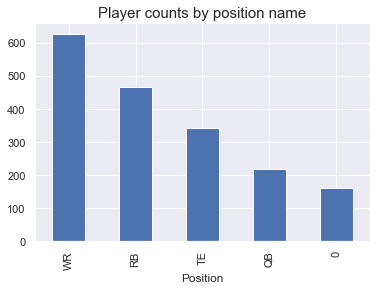

In [9]:
sns.set()
fantasy_df['position'].value_counts().plot.bar()
plt.title('Player counts by position name', fontsize=15)
plt.xlabel('Position');

### From above we can see that WR, RB, TE, and QB are all featured in the fantasy stats, which makes sense. What doesn't make sense is that there is a position named 0. We will use a pivot_table to inspect the stats of the positions.

In [10]:
# We can check the fantasy stats for each position by using 'position' as the index of a pivot table
table = pd.pivot_table(data=fantasy_df,index=['position'])
table

,fumbles_lost,games_played,int,passing_att,passing_cmp,passing_td,passing_yds,receiving_td,receiving_yds,receptions,rushing_att,rushing_td,rushing_yds,stats_year,targets
position,,,,,,,,,,,,,,,
0,0.043478,4.931677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.198758,0.217391
QB,1.640553,8.576037,5.751152,243.746544,154.741935,10.889401,1753.327189,0.046083,1.460829,0.207373,24.635945,1.000000,105.566820,2017.990783,0.281106
RB,0.500000,11.562232,0.006438,0.045064,0.027897,0.006438,0.381974,0.701717,140.478541,17.517167,72.562232,2.165236,305.251073,2017.989270,23.137339
TE,0.146199,12.426901,0.002924,0.011696,0.002924,0.000000,0.043860,1.704678,228.842105,20.593567,0.181287,0.011696,0.883041,2018.023392,30.818713
WR,0.277512,11.708134,0.006380,0.084530,0.046252,0.022329,1.199362,2.309410,378.787879,29.271132,1.829346,0.054226,10.827751,2018.025518,47.826156


### We can see from the above statistics that position 0 had extremely low fantasy stats. As a result, we can filter out these values.

In [11]:
# Data Cleaning step 4 - removing rows containing position 0 from the dataframe
# Create a filter of the values to remove
filter = (fantasy_df['position']=='0')

In [12]:
# Remove the rows containing the unwanted values
fantasy_df = fantasy_df[~filter]

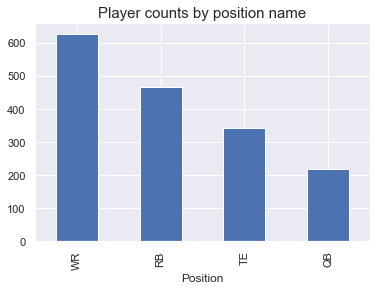

In [13]:
# Check to make confirm the values were removed
fantasy_df['position'].value_counts().plot.bar()
plt.title('Player counts by position name', fontsize=15)
plt.xlabel('Position');

In [14]:
fantasy_df.columns

Index(['stats_year', 'fumbles_lost', 'games_played', 'player_name', 'position',
       'team', 'int', 'passing_att', 'passing_cmp', 'passing_td',
       'passing_yds', 'receiving_td', 'receiving_yds', 'receptions', 'targets',
       'rushing_att', 'rushing_td', 'rushing_yds'],
      dtype='object')

### As the final step, we will add a column containing the total fantasy points scored. This score will be calculated using the standard fantasy football scoring conventions.  
Passing Yards: 1 point per 25 yards  
Passing Touchdowns: 4 points  
Passing Interceptions: -2 points  
Receptions: 1 points  
Receiving Yards: 1 point per 10 yards  
Receiving Touchdowns: 6 points   
Rushing Yards: 1 point per 10 yards    
Rushing Touchdowns: 6 points  
Fumbles Lost: -2 points


In [15]:
# Data cleaning step 5 - Create a new columns that calculates the total fantasy points scored
fantasy_df['Fantasy_Points'] = fantasy_df['passing_yds']/25 + fantasy_df['passing_td']*4 - fantasy_df['int']*2 + fantasy_df['receptions'] + fantasy_df['receiving_yds']/10 + fantasy_df['receiving_td']*6 + fantasy_df['rushing_yds']/10 + fantasy_df['rushing_td']*6 - fantasy_df['fumbles_lost']*2

In [16]:
fantasy_df.head()

,stats_year,fumbles_lost,games_played,player_name,position,team,int,passing_att,passing_cmp,passing_td,passing_yds,receiving_td,receiving_yds,receptions,targets,rushing_att,rushing_td,rushing_yds,Fantasy_Points
0,2017,2.0,15.0,Todd Gurley,RB,LAR,0.0,0.0,0.0,0.0,0.0,6.0,788.0,64.0,87.0,279.0,13.0,1305.0,383.3
1,2017,2.0,15.0,Le'Veon Bell,RB,PIT,0.0,0.0,0.0,0.0,0.0,2.0,655.0,85.0,106.0,321.0,9.0,1291.0,341.6
2,2017,1.0,16.0,Kareem Hunt,RB,KAN,0.0,0.0,0.0,0.0,0.0,3.0,455.0,53.0,63.0,272.0,8.0,1327.0,295.2
3,2017,1.0,16.0,Alvin Kamara,RB,NOR,0.0,0.0,0.0,0.0,0.0,5.0,826.0,81.0,100.0,120.0,8.0,728.0,312.4
4,2017,0.0,16.0,Melvin Gordon,RB,LAC,0.0,0.0,0.0,0.0,0.0,4.0,476.0,58.0,83.0,284.0,8.0,1105.0,288.1


In [18]:
fantasy_df.sort_values(by=['Fantasy_Points'],ascending=False)

,stats_year,fumbles_lost,games_played,player_name,position,team,int,passing_att,passing_cmp,passing_td,passing_yds,receiving_td,receiving_yds,receptions,targets,rushing_att,rushing_td,rushing_yds,Fantasy_Points
0,2019,0.0,16.0,Christian McCaffrey,RB,CAR,0.0,2.0,0.0,0.0,0.0,4.0,1005.0,116.0,142.0,287.0,15.0,1387.0,469.20
1,2019,2.0,15.0,Lamar Jackson,QB,BAL,6.0,401.0,265.0,36.0,3127.0,0.0,0.0,0.0,0.0,176.0,7.0,1206.0,415.68
4,2018,2.0,16.0,Patrick Mahomes,QB,KAN,12.0,580.0,383.0,50.0,5097.0,0.0,0.0,0.0,0.0,60.0,2.0,272.0,415.08
2,2018,1.0,16.0,Christian McCaffrey,RB,CAR,0.0,1.0,1.0,1.0,50.0,6.0,867.0,107.0,124.0,219.0,7.0,1098.0,385.50
1,2018,0.0,16.0,Saquon Barkley,RB,NYG,0.0,0.0,0.0,0.0,0.0,4.0,721.0,91.0,121.0,261.0,11.0,1307.0,383.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2018,1.0,5.0,Geno Smith,QB,LAC,0.0,4.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,-1.48
617,2019,0.0,3.0,Jarrett Stidham,QB,NWE,1.0,4.0,2.0,0.0,14.0,0.0,0.0,0.0,0.0,2.0,0.0,-2.0,-1.64
568,2017,1.0,1.0,Tyler Bray,QB,KAN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.00
619,2018,0.0,2.0,Kyle Lauletta,QB,NYG,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.0,-2.20
